In [1]:
from loader import *

class PowerLoader(Loader):

    def __init__(self):
        super().__init__()
        self.my_path = "power_industry/"
        self.keys = ['brent', 'natural_gas']
        self.dict = dict.fromkeys(self.keys)

    def load(self):
        df_brent = pd.read_csv(self.path + self.my_path + 'brent.csv', header = 0, index_col = ['Date'])
        df_brent.index = pd.to_datetime(df_brent.index)
        self.dict['brent'] = df_brent

        df_natural_gas = pd.read_csv(self.path + self.my_path + 'natural_gas.csv', header = 0, index_col = ['Month'])
        df_natural_gas.index = pd.to_datetime(df_natural_gas.index)
        df_natural_gas.index.names = ['Date']
        self.dict['natural_gas'] = df_natural_gas

    def get_summary(self):
        #HTML
        self.write_html(self.result_path + self.my_path, "brent_summary", self.dict['brent'])

        #PLOTS
        
        #brent
        df_brent = self.dict['brent']
        ax = df_brent.plot(kind='line', x_compat=True)
        plt.xticks(rotation=60)
        plt.title('Brent spot prices')
        plt.ylabel('Dollars per barrel')
        plt.xlabel('date')
        self.save_figure(ax, self.result_path + self.my_path, "brent_demo")

        #natural gas
        df_natural_gas = self.dict['natural_gas']
        ax = df_natural_gas.plot(kind='line', x_compat=True)
        plt.xticks(rotation=60)
        plt.title('Price of natural gas')
        plt.ylabel('US($)')
        plt.xlabel('date')
        self.save_figure(ax, self.result_path + self.my_path, "natural_gas_demo")

    def get_data(self):
        return self.dict

In [33]:
file = 'petroleum.csv'
path = '../datasets/power_industry/' + file

df = pd.read_csv(path, index_col=['GEO/TIME'], decimal=',')
df = df.T
df.columns.names = ['']
df = df.rename(columns={'Germany (until 1990 former territory of the FRG)': 'Germany'})
df.index = pd.to_datetime(df.index)
df.loc['2010', 'Spain']

2010-01-01    5717.0
2010-02-01    5511.0
2010-03-01    6421.0
2010-04-01    5805.0
2010-05-01    5727.0
2010-06-01    5944.0
2010-07-01    6196.0
2010-08-01    5837.0
2010-09-01    5797.0
2010-10-01    5984.0
2010-11-01    5947.0
2010-12-01    5992.0
Name: Spain, dtype: float64

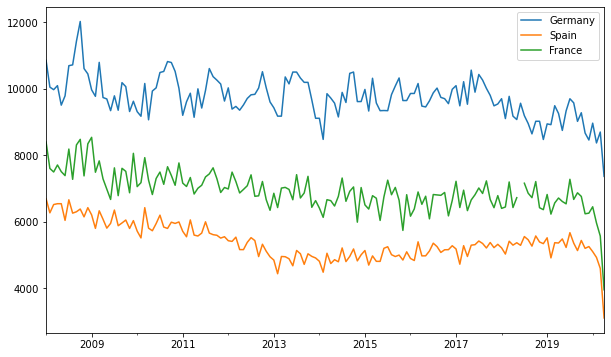

In [34]:
a = df[['Germany', 'Spain', 'France']]
ax = a.plot(kind='line', figsize=(10, 6))
